In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
data = pd.read_csv("C:/Users/AKASH HN/Downloads/Dataset/Bank Marketing.csv", sep = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Distribution of Numerical and Categorical data

In [5]:
num_cols = [col for col in data.select_dtypes(include = np.number)]
cat_cols = [col for col in data.columns if col not in num_cols]

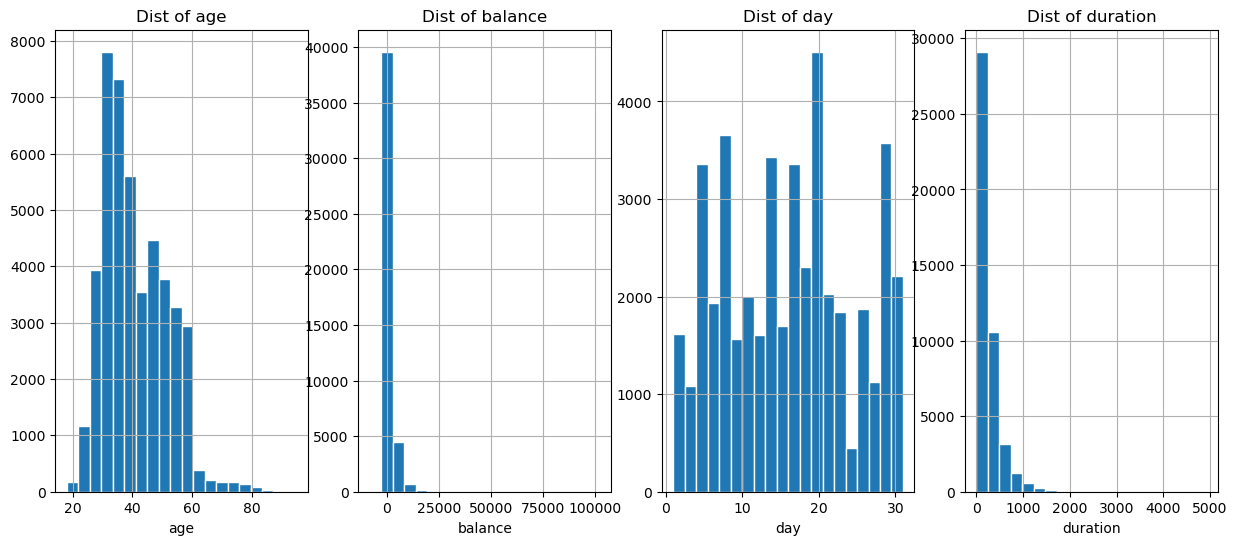

In [6]:
fig, ax = plt.subplots(1, len(num_cols[:4]), figsize = (15, 6))
for i,col in enumerate(num_cols[:4]):
    data[col].hist(ax = ax[i], bins = 20, edgecolor = 'white')
    ax[i].set_title(f'Dist of {col}')
    ax[i].set_xlabel(col)

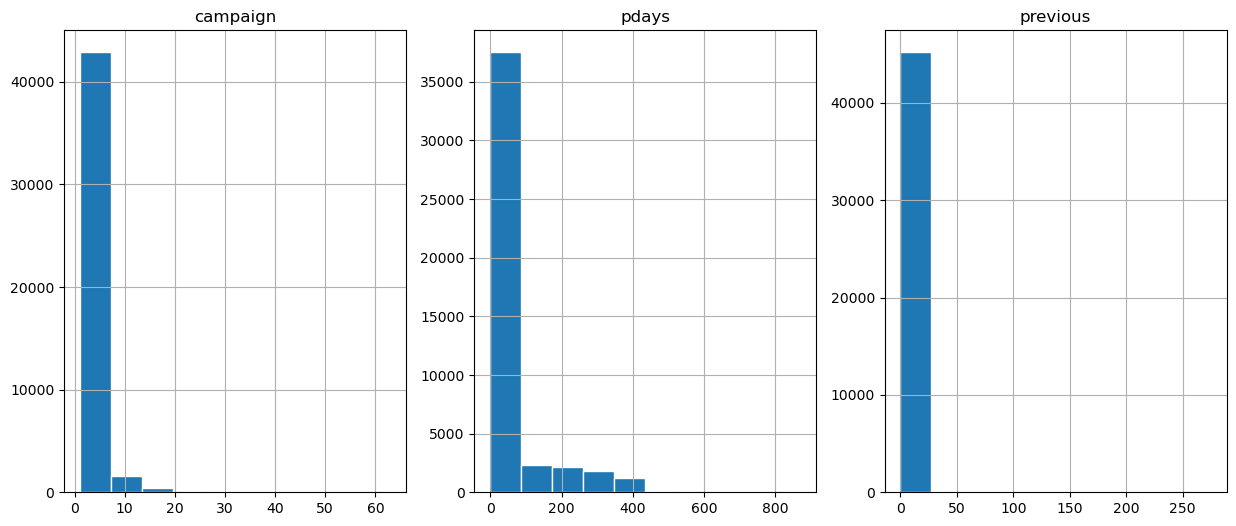

In [7]:
fig, ax = plt.subplots(1, len(num_cols[4:]), figsize = (15, 6))
for i,col in enumerate(num_cols[4:]):
    data[col].hist(ax = ax[i], edgecolor = 'white', bins = 10)
    ax[i].set_title(col)

In [8]:
col1 = ['job', 'marital', 'education', 'month', 'poutcome']
col2 = [col for col in cat_cols if col not in col1]

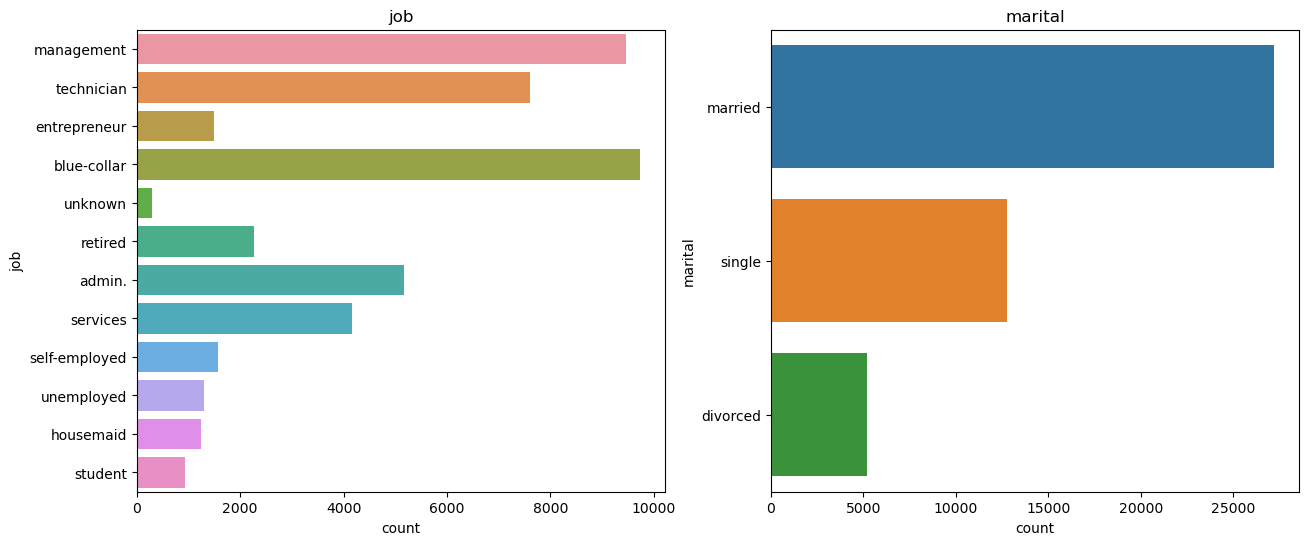

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
for i, col in enumerate(['job', 'marital']):
    sns.countplot(data = data, y = col, ax = ax[i], orient='v')
    ax[i].set_title(col)
plt.show()

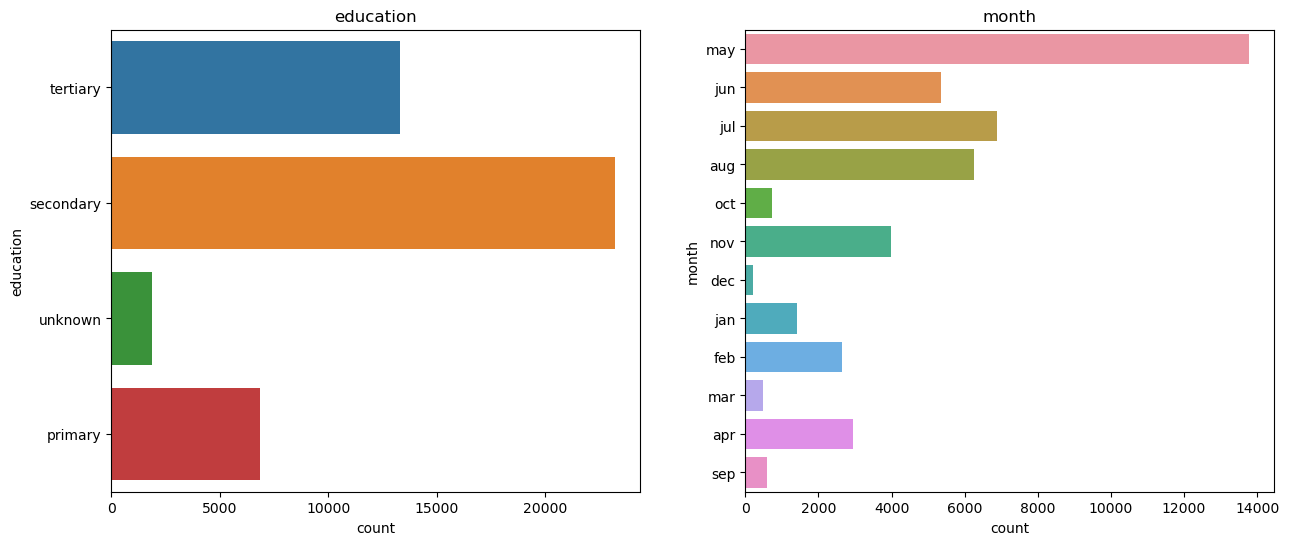

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
for i, col in enumerate(['education', 'month']):
    sns.countplot(data = data, y = col, ax = ax[i], orient='v')
    ax[i].set_title(col)
plt.show()

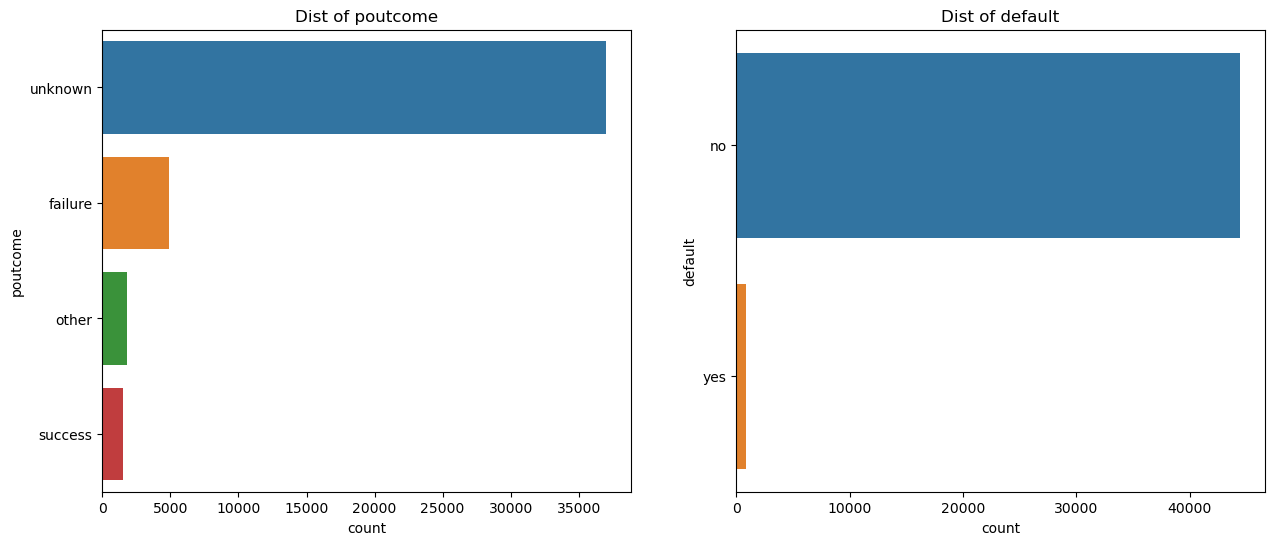

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
for i, col in enumerate(['poutcome', 'default']):
    sns.countplot(data = data, y = col, ax = ax[i], orient='v')
    ax[i].set_title(f'Dist of {col}')
plt.show()

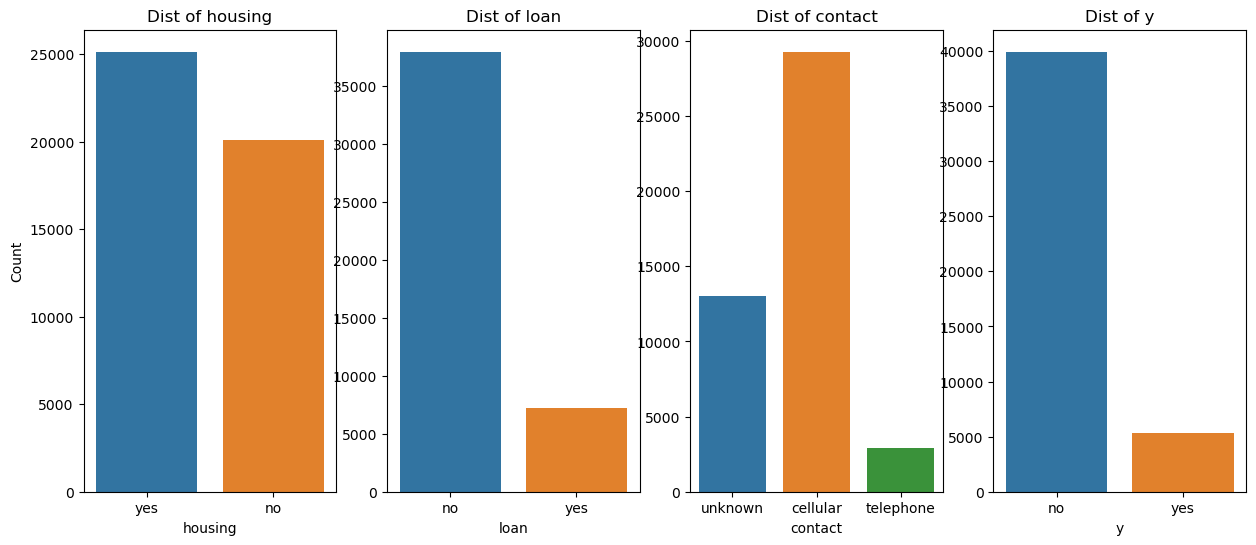

In [12]:
fig, ax = plt.subplots(1, 4, figsize = (15, 6))
for i, col in enumerate(['housing', 'loan', 'contact', 'y']):
    sns.countplot(data = data, x = col, ax = ax[i], orient='v')
    ax[i].set_title(f'Dist of {col}')
    ax[i].set_ylabel('')
    ax[i].set_xlabel(col)
ax[0].set_ylabel('Count')
plt.show()

In [13]:
encoder = LabelEncoder()
for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

<Axes: >

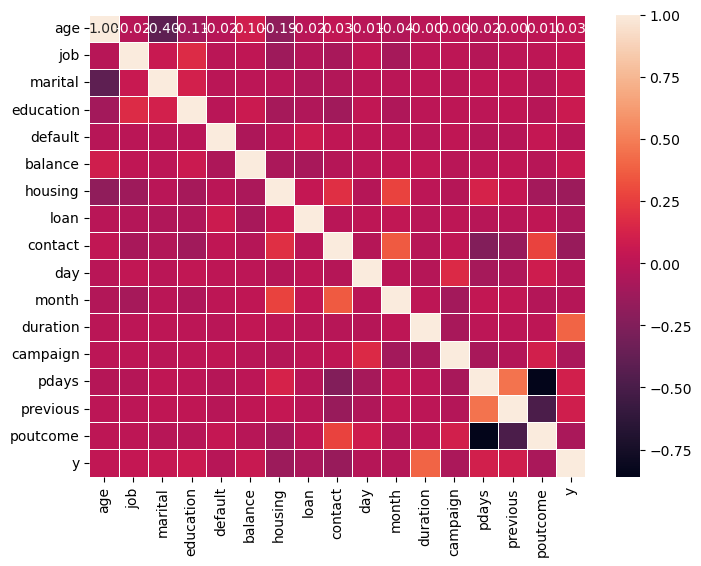

In [14]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot = True, fmt = '.2f',  linewidth = 0.5)


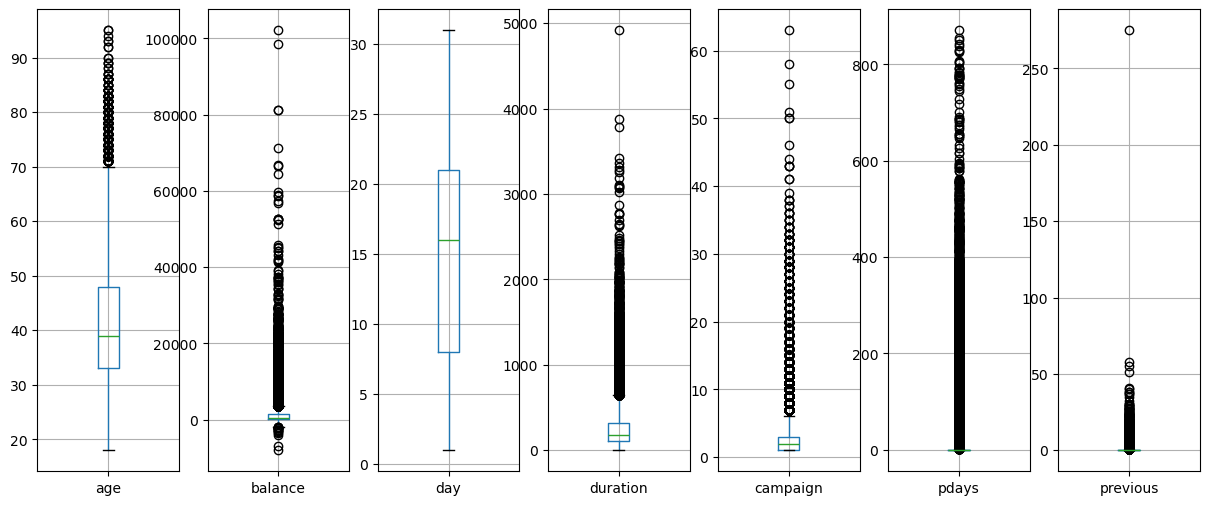

In [15]:
def plot_boxplot(data):
    fig, ax = plt.subplots(1, len(num_cols), figsize = (15,6))
    for i, col in enumerate(num_cols):
        data.boxplot(column = col, ax = ax[i])
    plt.show()
plot_boxplot(data)

In [16]:
def remove_outliers(df,cols):
    new_df = df
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        new_df[col] = new_df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
    return new_df
new_data = remove_outliers(data,num_cols)

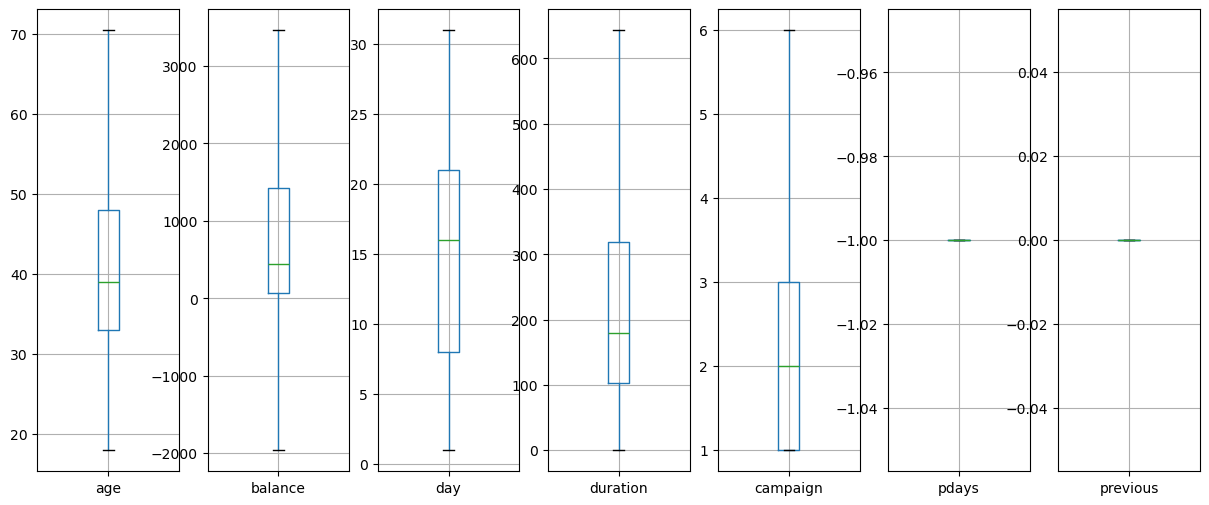

In [17]:
plot_boxplot(new_data)

In [18]:
encoder = LabelEncoder()
for col in cat_cols:
    new_data[col] = encoder.fit_transform(new_data[col])

In [19]:
X = new_data.drop('y', axis = 1)
y = new_data['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [20]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
clf.fit(X_train, y_train)
x_pred = clf.predict(X_train)
print(f'Train accuracy: {accuracy_score(y_train, x_pred):.2%}')

y_pred = clf.predict(X_test)
print(f'Test accuracy: {accuracy_score(y_test, y_pred):.2%}')

Train accuracy: 89.25%
Test accuracy: 88.50%


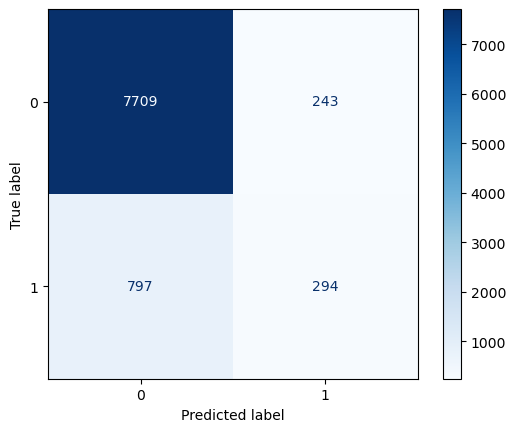

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap = plt.cm.Blues)

In [22]:
test_acc = []
train_acc = []
for i in range(1,21):
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    clf.fit(X_train, y_train)
    x_pred = clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, x_pred))

    y_pred = clf.predict(X_test)
    test_acc.append(accuracy_score(y_test, y_pred))
    

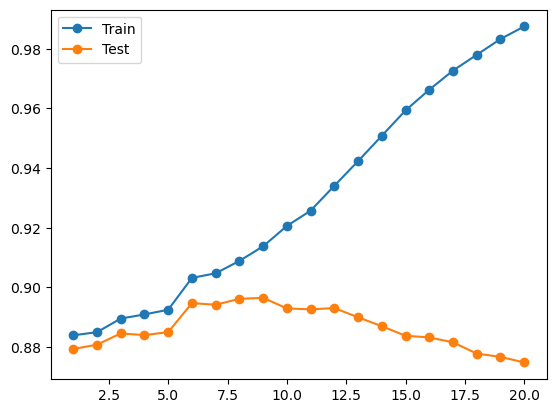

In [23]:
plt.plot(range(1, 21), train_acc, '-o',label = 'Train')
plt.plot(range(1, 21), test_acc, '-o',label = 'Test')
plt.legend()
plt.show()

In [24]:
param = {'criterion' : ['entropy', 'gini'],
    'max_depth' : [1,5,10,15,20],
    'min_samples_split' : [2, 5, 10]
}
grid = GridSearchCV(DecisionTreeClassifier(), param, cv = 10, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_estimator_)

Best Parameters:  DecisionTreeClassifier(criterion='entropy', max_depth=10)


In [25]:
print(f'Train accuracy: {accuracy_score(y_train, grid.best_estimator_.predict(X_train)):.2%}')
print(f'Test accuracy: {accuracy_score(y_test, grid.best_estimator_.predict(X_test)):.2%}')
y_pred = grid.best_estimator_.predict(X_test)

Train accuracy: 92.06%
Test accuracy: 89.27%


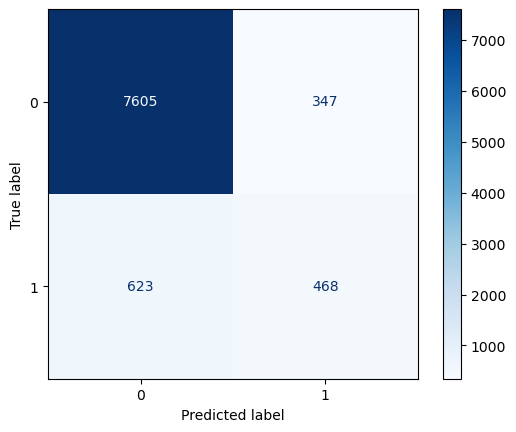

In [26]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap = plt.cm.Blues, ax = plt.gca())

In [27]:
data[data['y'] == 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4,1,2,0,2143.0,1,0,2,5,8,261.0,1.0,-1.0,0.0,3,0
1,44.0,9,2,1,0,29.0,1,0,2,5,8,151.0,1.0,-1.0,0.0,3,0
2,33.0,2,1,1,0,2.0,1,1,2,5,8,76.0,1.0,-1.0,0.0,3,0
3,47.0,1,1,3,0,1506.0,1,0,2,5,8,92.0,1.0,-1.0,0.0,3,0
4,33.0,11,2,3,0,1.0,0,0,2,5,8,198.0,1.0,-1.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59.0,4,1,2,0,138.0,1,1,0,16,9,162.0,2.0,-1.0,0.0,0,0
45198,37.0,4,1,2,0,1428.0,0,0,0,16,9,333.0,2.0,-1.0,0.0,3,0
45199,34.0,1,2,1,0,1475.0,1,0,0,16,9,643.0,3.0,-1.0,0.0,1,0
45209,57.0,1,1,1,0,668.0,0,0,1,17,9,508.0,4.0,-1.0,0.0,3,0


In [28]:
new_data = np.array([[38.0, 5, 1, 2, 0, 2000.0, 0, 1, 0, 20, 4, 600.0, 2.0, -1.0, 0.0, 2]])
new_df = pd.DataFrame(new_data, columns = X.columns)
new_pred = grid.best_estimator_.predict(new_df)
if new_pred:
    print('Customer will purchase the product')
else :
    print('Customer will not  purchase the product')
    

Customer will purchase the product
